<a href="https://colab.research.google.com/github/BEST-PK/DPDM2024/blob/main/DPDM_2024_Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **โจทย์**
จากตารางฐานข้อมูล ต่างๆต่อไปนี้

https://drive.google.com/drive/folders/15z9pnjM2cJwLU2ewL_JFPc3LJhrDmcbV?usp=sharing

ให้สืบหาฆาตรกร ในคดี ฆาตรกรรม (murder) ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City โดยเริ่มจากการตรวจสอบ ข้อมูลคดี (crime_scene_report.csv)

*หมายเหตุ*

- person.csv : ข้อมูลประชากร

- interview.csv : ข้อมูลการสอบสวน

- income.csv : ข้อมูลรายได้

- get_fit_now_member.csv : ข้อมูลสมาชิก ฟิตเนส Get Fit Now

- get_fit_now_check_in.csv : ข้อมูลการเข้าใช้ ฟิตเนส Get Fit Now

- facebook_event_checkin.csv : ข้อมูลการเช็คอิน Facebook

- driver_license.csv : ข้อมูลใบขับขี่

- crime_scene_report.csv : ข้อมูลคดี

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# **STEP1 ตรวจสอบข้อมูลคดี**
ในคดีฆาตรกรรม (murder) ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City โดยเริ่มจากการตรวจสอบข้อมูลคดี (crime_scene_report.csv)

In [ ]:
crime_scene_report = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/crime_scene_report.csv')
crime_scene_report

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


In [ ]:
crime_scene_report.dtypes

,0
date,int64
type,object
description,object
city,object


## ค้นหาข้อมูลคดีที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City
จากการตรวจสอบข้อมูลคดี (crime_scene_report.csv) ในคดีฆาตรกรรม (murder) ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City

In [ ]:
crime_information =crime_scene_report[
    (crime_scene_report['type'] == 'murder') &
    (crime_scene_report['date'] == 20180115) &
    (crime_scene_report['city'] == 'SQL City')]
crime_information

,date,type,description,city
1227,20180115,murder,Security footage shows that there were 2 witne...,SQL City


จากข้อมูลคดีที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City ได้ระบุว่า

    "วิดีโอจากกล้องวงจรปิด พบพยาน 2 คน ที่อยู่ในเหตุการณ์" โดย
     *   พยานคนที่ 1 ทราบข้อมูลว่า อาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน "Northwestern Dr"
     *   พยานคนที่ 2 ชื่อ "Annabel" อาศัยอยู่ที่ไหนสักแห่งบนถนน "Franklin Ave"



# **STEP2 สืบหาตัวพยาน**
ทำการสืบหาตัวพยานจากข้อมูลประชากร (person.csv)







In [ ]:
person = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/person.csv')
person

,id,name,license_id,address_number,address_street_name,ssn
0,10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
1,10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
3,10016,Era Moselle,431897,1987,Wood Glade St,614621061
4,10025,Trena Hornby,550890,276,Daws Hill Way,223877684
...,...,...,...,...,...,...
10006,99936,Luba Benser,274427,680,Carnage Blvd,685095054
10007,99941,Roxana Mckimley,975942,1613,Gate St,512136801
10008,99965,Cherie Zeimantz,287627,3661,The Water Ave,362877324
10009,99982,Allen Cruse,251350,3126,N Jean Dr,348734531


ข้อมูลประชากร (person.csv) ประกอบไปด้วยตัวแปร

1.   หมายเลขประจำตัวประชาชน (id)
2.   ชื่อ (name)
3.   หมายเลขใบขับขี่ (license_id)
4.   หมายเลขที่อยู่ (address_number)
5.   ถนนที่อาศัยอยู่ (address_street_number)
6.   หมายเลขประกันสังคม (ssn)

In [ ]:
person.dtypes

,0
id,int64
name,object
license_id,int64
address_number,int64
address_street_name,object
ssn,int64


## **พยานคนที่ 1** : ทราบข้อมูลว่า อาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน "Northwestern Dr"



In [ ]:
witness1 = person[person['address_street_name'] == 'Northwestern Dr'].sort_values(by='address_number', ascending=False) # จัดเรียงตาม 'address_number' จากมากไปน้อย
witness1

,id,name,license_id,address_number,address_street_name,ssn
499,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
811,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
4886,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
7040,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
9609,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829
1021,19420,Cody Schiel,890431,3524,Northwestern Dr,947110049
9272,93509,Emmitt Aceuedo,916706,3491,Northwestern Dr,979073160
8608,87456,Leonora Wolfsberger,215868,3483,Northwestern Dr,565203106
2871,36378,Freddie Ellzey,267882,3449,Northwestern Dr,474117596
4806,53076,Boris Bijou,664914,3327,Northwestern Dr,401191868


จากข้อมูลเบื้องต้นที่ระบุว่า พยานคนที่ 1 " อาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน Northwestern Dr "

การพิจารณาตำแหน่งบ้านหลังสุดท้ายจะพิจารณาจากข้อมูลตัว  address_number ที่มีค่ามากที่สุด







In [ ]:
witness1 = witness1[witness1['address_number'] == witness1['address_number'].max()]
witness1

,id,name,license_id,address_number,address_street_name,ssn
499,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


    จากข้อมูลเบื้องต้นที่ระบุว่า พยานคนที่ 1  " อาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน Northwestern Dr "
     ดังนั้น พยายานคนที่ 1 คือ "Morty Schapiro"

In [ ]:
witness1.insert(0, 'witness_number', 1)
witness1

,witness_number,id,name,license_id,address_number,address_street_name,ssn
499,1,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


## **พยานคนที่ 2** : ชื่อ "Annabel" อาศัยอยู่ที่ไหนสักแห่งบนถนน "Franklin Ave"

In [ ]:
witness2 = person[
    person['name'].str.contains('Annabel') &
    (person['address_street_name'] == 'Franklin Ave')]
witness2

,id,name,license_id,address_number,address_street_name,ssn
665,16371,Annabel Miller,490173,103,Franklin Ave,318771143


    จากข้อมูลเบื้องต้นที่ระบุว่า พยานคนที่ 2 ชื่อ "Annabel" อาศัยอยู่ที่ไหนสักแห่งบนถนน "Franklin Ave"
    พบผู้ที่เป็นไปได้เพียง 1 คน ดังนั้น พยายานคนที่ 2 คือ "Annabel Miller"



In [ ]:
witness2.insert(0, 'witness_number', 2)
witness2

,witness_number,id,name,license_id,address_number,address_street_name,ssn
665,2,16371,Annabel Miller,490173,103,Franklin Ave,318771143


## **ผลการสืบพยาน**
ดังนั้น พยานในเหตุการณ์ทั้งสิ้น 2 คน ได้แก่
1.   Morty Schapiro
2.   Annabel Miller










In [ ]:
witness_data= pd.concat([witness1, witness2])
witness_data

,witness_number,id,name,license_id,address_number,address_street_name,ssn
499,1,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
665,2,16371,Annabel Miller,490173,103,Franklin Ave,318771143


# **STEP3 ตรวจสอบคำให้การของพยาน**
โดยทำการตรวจสอบจาก ข้อมูลการสอบสวน (interview.csv)

## **ขั้นตอนการค้นหาคำให้การของพยาน**

In [ ]:
interview = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/ interview.csv')
interview

,person_id,transcript
0,28508,‘I deny it!’ said the March Hare.\n
1,63713,\n
2,86208,"way, and the whole party swam to the shore.\n"
3,35267,"lessons in here? Why, there’s hardly room for ..."
4,33856,\n
...,...,...
4986,37357,Alice did not wish to offend the Dormouse agai...
4987,10206,"time,’ she said, ‘than waste it in asking ridd..."
4988,14887,I heard a gunshot and then saw a man run out. ...
4989,16371,"I saw the murder happen, and I recognized the ..."


ข้อมูลการสอบสวน (interview.csv)ประกอบไปด้วยตัวแปร

1.   หมายเลขประจำตัวประชาชน (person_id)
2.   คำให้การ (transcript)


In [ ]:
interview.dtypes

,0
person_id,int64
transcript,object


ค้นหาคำให้การของพยานทั้ง 2 คน โดยใช้การ merge  2 DataFrame โดยใช้หมายเลขประชาชน (person_id ของตาราง witness_data กับ id ของตาราง interview) เป็นคีย์สำหรับการจับคู่ข้อมูลระหว่างสอง DataFrame ได้แก่

**witness_data**
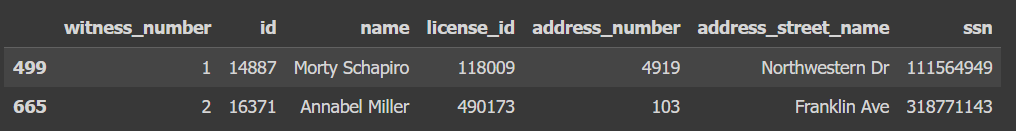


 **interview**


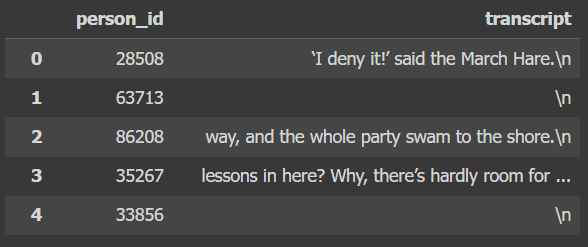


 โดยมีขั้นตอนดังนี้



1. ทำการเปลี่ยนชื่อตัวแปรของที่ใช้เป็น key ของ 2 DataFrame ให้เหมือนกัน

โดยเลือกเปลี่ยนตัวแปร  หมายเลขประจำตัวประชาชน ในตาราง  witness_data จาก id เป็น person_id

In [ ]:
witness_data = witness_data.rename(columns={'id': 'person_id'})

,witness_number,person_id,name,license_id,address_number,address_street_name,ssn
499,1,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
665,2,16371,Annabel Miller,490173,103,Franklin Ave,318771143


2. ทำการรวม (merge) ข้อมูลจากสอง DataFrame คือ witness_data และ interview โดยใช้คอลัมน์ person_id เป็นคีย์สำหรับการจับคู่ข้อมูลระหว่างสอง DataFrame

In [ ]:
witness_data =witness_data.merge(interview, on='person_id')
witness_data

,witness_number,person_id,name,license_id,address_number,address_street_name,ssn,transcript
0,1,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949,I heard a gunshot and then saw a man run out. ...
1,2,16371,Annabel Miller,490173,103,Franklin Ave,318771143,"I saw the murder happen, and I recognized the ..."


## **ผลการตรวจสอบคำให้การของพยาน**

จากข้อมูลสอบสวนจากพยาน พบว่า

***พยายคนที่ 1***

 - Morty Schapiro  ให้ข้อมูลว่า "I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with "48Z". Only gold members have those bags. The man got into a car with a plate that included "H42W".
       "ฉันได้ยินเสียงปืนแล้วยังเห็นชายคนหนึ่งวิ่งออกมา เขามีกระเป๋าของยิม 'Get Fit Now Gym' หมายเลขสมาชิกบนกระเป๋าเริ่มต้นด้วย '48Z' มีแค่สมาชิกระดับโกลด์เท่านั้นที่มีกระเป๋าแบบนี้ ชายคนนั้นขึ้นรถที่มีทะเบียนซึ่งมี 'H42W' "

***พยายคนที่ 2***  
- Annabel Miller ให้ข้อมูลว่า "I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."

      "ฉันเห็นเหตุการณ์ฆาตกรรมเกิดขึ้น และฉันจำฆาตกรได้จากยิมของฉันตอนที่ฉันออกกำลังกายเมื่อสัปดาห์ที่แล้วในวันที่ 9 มกราคม"

  

In [ ]:
witness_data

,witness_number,person_id,name,license_id,address_number,address_street_name,ssn,transcript
0,1,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949,I heard a gunshot and then saw a man run out. ...
1,2,16371,Annabel Miller,490173,103,Franklin Ave,318771143,"I saw the murder happen, and I recognized the ..."


# **STEP4 สืบหาตัวฆาตกร**
จากคำให้การของพยานสามารถ จำแนกการสืบหาฆาตกรจากแหล่งข้อมูลได้ 2 แหล่งคือ


1.   ข้อมูลจากฟิตเนส Get Fit Now


     อ้างอิงจากคำให้การของพยานคนที่ 1 : ฆาตกรมีกระเป๋าของยิม 'Get Fit Now Gym' หมายเลขสมาชิกบนกระเป๋าเริ่มต้นด้วย '48Z' ซึ่งมีแค่สมาชิกระดับ 'gold' เท่านั้นที่มีกระเป๋าแบบนี้

     อ้างอิงจากคำให้การของพยานคนที่ 2 :จำฆาตกรได้จากยิมที่เมื่อสัปดาห์ที่แล้วในวันที่ 9 มกราคม
2.  ข้อมูลยานพาหนะที่ใช้หลบหนี


     อ้างอิงจากคำให้การของพยานคนที่ 1 : ขึ้นรถที่มีทะเบียนซึ่งมี 'H42W'



## 4.1 สืบจากข้อมูลฟิตเนส Get Fit Now
เนื่องจากคำให้การของพยาน 2 คนมีมูลที่ตรงกันว่า

**พยานคนที่ 1** ระบุว่า
- ฆาตกรมีกระเป๋าของยิม 'Get Fit Now Gym'
- หมายเลขสมาชิกบนกระเป๋าเริ่มต้นด้วย '48Z'
- มีแค่สมาชิกระดับ  'gold' เท่านั้นที่มีกระเป๋าแบบนี้



**พยานคนที่ 2** ระบุว่า
- จำฆาตกรได้จากยิมที่เมื่อสัปดาห์ที่แล้วในวันที่ 9 มกราคม

จึงทำการสืบหาฆาตกรว่าคือใคร ? โดยอาศัยข้อมูล 2 ชุด ได้แก่
1. ข้อมูลสมาชิกฟิตเนส Get Fit Now   (get_fit_now_member.csv)
2.   ข้อมูลการเข้าใช้ฟิตเนส Get Fit Now (get_fit_now_check_in.csv)

มีขั้นตอนดังต่อไปนี้

1. สำรวจข้อมูลสมาชิกฟิตเนส Get Fit Now (get_fit_now_member.csv)

In [ ]:
#ข้อมูลสมาชิกฟิตเนส Get Fit Now
get_fit_now_member = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/get_fit_now_member.csv')
get_fit_now_member

,id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver
...,...,...,...,...,...
179,2V137,41693,Wendell Dulany,20171219,silver
180,4KB72,79110,Emile Hege,20170522,regular
181,48Z7A,28819,Joe Germuska,20160305,gold
182,48Z55,67318,Jeremy Bowers,20160101,gold


2. สำรวจข้อมูลการเข้าใช้ฟิตเนส Get Fit Now (get_fit_now_check_in.csv)

In [ ]:
get_fit_now_check_in = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/get_fit_now_check_in.csv')
get_fit_now_check_in

,membership_id,check_in_date,check_in_time,check_out_time
0,NL318,20180212,329,365
1,NL318,20170811,469,920
2,NL318,20180429,506,554
3,NL318,20180128,124,759
4,NL318,20171027,418,1019
...,...,...,...,...
2698,4KB72,20170422,1016,1114
2699,4KB72,20170630,408,885
2700,48Z7A,20180109,1600,1730
2701,48Z55,20180109,1530,1700


3.  ทำการรวมข้อมูล 2 DataFrame คือ get_fit_now_member กับ get_fit_now_check_in  เข้าด้วยกัน

    โดยใช้ key ในการจับคู่คือ "หมายเลขสมาชิกฟิตเนส (membership_id)"
    
(เนื่องจากในตาราง get_fit_now_member หมายเลขสมาชิกฟิตเนส แทนด้วย id จึงเปลี่ยนจาก id >> membership_id เพื่อให้เหมือนกับตาราง get_fit_now_check_in)


In [ ]:
get_fit_now_member=get_fit_now_member.rename(columns={'id':'membership_id'})
get_fit_now_member

,membership_id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver
...,...,...,...,...,...
179,2V137,41693,Wendell Dulany,20171219,silver
180,4KB72,79110,Emile Hege,20170522,regular
181,48Z7A,28819,Joe Germuska,20160305,gold
182,48Z55,67318,Jeremy Bowers,20160101,gold


In [ ]:
get_fit_now_member = get_fit_now_member.merge(get_fit_now_check_in, left_on='membership_id', right_on='membership_id', how='outer')
get_fit_now_member

,membership_id,person_id,name,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time
0,NL318,65076,Everette Koepke,20170926,gold,20180212,329,365
1,NL318,65076,Everette Koepke,20170926,gold,20170811,469,920
2,NL318,65076,Everette Koepke,20170926,gold,20180429,506,554
3,NL318,65076,Everette Koepke,20170926,gold,20180128,124,759
4,NL318,65076,Everette Koepke,20170926,gold,20171027,418,1019
...,...,...,...,...,...,...,...,...
2698,4KB72,79110,Emile Hege,20170522,regular,20170422,1016,1114
2699,4KB72,79110,Emile Hege,20170522,regular,20170630,408,885
2700,48Z7A,28819,Joe Germuska,20160305,gold,20180109,1600,1730
2701,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700


4.สืบจากคำให้การของพยาน

**พยานคนที่ 1** ระบุว่า
- ฆาตกรมีกระเป๋าของยิม 'Get Fit Now Gym'
- หมายเลขสมาชิกบนกระเป๋าเริ่มต้นด้วย '48Z'
- มีแค่สมาชิกระดับ  'gold' เท่านั้นที่มีกระเป๋าแบบนี้



**พยานคนที่ 2** ระบุว่า
- จำฆาตกรได้จากยิมที่เมื่อสัปดาห์ที่แล้วในวันที่ 9 มกราคม




In [ ]:
assasin = get_fit_now_member[
             (get_fit_now_member['membership_status'] == 'gold') #ฆาตกรเป็น membership_status ระดับ "gold"
            & (get_fit_now_member['membership_id'].str.startswith('48Z')) # membership_id เริ่มต้นด้วยอักษร "48Z"
            &(get_fit_now_member['check_in_date'] == 20180109)]  #ฆาตกรไปยิมในวันที่ 9 มกราคม 2018
assasin

,membership_id,person_id,name,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time
2700,48Z7A,28819,Joe Germuska,20160305,gold,20180109,1600,1730
2701,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700


### **ผลการสืบจากข้อมูลฟิตเนส Get Fit Now**
    บุคคลที่คาดว่าจะเป็นฆาตรกร มี 2 คน คือ
      1.   Joe Germuska   
      2.   Jeremy Bowers  






In [ ]:
assasin

,membership_id,person_id,name,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time
2700,48Z7A,28819,Joe Germuska,20160305,gold,20180109,1600,1730
2701,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700


In [ ]:
person=person.rename(columns={'id': 'person_id'})
person

,person_id,name,license_id,address_number,address_street_name,ssn
0,10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
1,10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
3,10016,Era Moselle,431897,1987,Wood Glade St,614621061
4,10025,Trena Hornby,550890,276,Daws Hill Way,223877684
...,...,...,...,...,...,...
10006,99936,Luba Benser,274427,680,Carnage Blvd,685095054
10007,99941,Roxana Mckimley,975942,1613,Gate St,512136801
10008,99965,Cherie Zeimantz,287627,3661,The Water Ave,362877324
10009,99982,Allen Cruse,251350,3126,N Jean Dr,348734531


In [ ]:
assasin = assasin.merge(person, on='person_id')
assasin

,membership_id,person_id,name_x,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time,name_y,license_id,address_number,address_street_name,ssn
0,48Z7A,28819,Joe Germuska,20160305,gold,20180109,1600,1730,Joe Germuska,173289,111,Fisk Rd,138909730
1,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


## **4.2 สืบจากรถที่ใช้หลบหนี**
เนื่องจากพยานคนที่ 1 ได้ระบุว่า
   
- ฆาตกรขึ้นรถที่มีหมายทะเบียน 'H42W'

ดังนั้น จึงทำการสืบหาฆาตกรว่าคือใคร ? โดยอาศัยข้อมูลใบขับขี่ (driver_license.csv)


มีขั้นตอนดังต่อไปนี้





1. สำรวจข้อมูลใบขับขี่ (driver_license.csv)

In [ ]:
drivers_license = pd.read_csv('/content/drive/MyDrive/Data_Exam1_DPDM/drivers_license.csv')
drivers_license

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


2.ทำการค้นหาว่ารถที่มีทะเบียน ประกอบด้วยตัวอักษร 'H42W' ไหม? และใครเป็นเจ้าของรถ ?

In [ ]:
assasin_drivers_data = drivers_license[drivers_license['plate_number'].str.contains('H42W')]
assasin_drivers_data

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
915,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
3529,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
6240,664760,21,71,black,black,male,4H42WR,Nissan,Altima


จากการตรวจสอบจากคำให้การของพยานคนที่ 1 ที่ระบุว่า   ฆาตกรขึ้นรถที่มีหมายทะเบียนประกอบด้วยตัวอักษร 'H42W'

   พบรถต้องสงสัยที่มีหมายทะเบียนประกอบด้วยตัวอักษร 'H42W' 3 คัน ได้แก่


1.  H42W0X  (license_id=183779)
2.   0H42W2 (license_id=423327)
3.   4H42WR (license_id=664760)

จึงทำการตรวจสอบต่อโดยการเชื่อมโยงหาเจ้าของรถเเต่ละคันว่าคือใครบ้าง ?

โดยอาศัยฐานข้อมูลประชากร (person) จากข้อมูลประชากร ทราบข้อมูล 'หมายเลขใบขับขี่' ถูกเก็บไว้ในตัวแปร 'license_id' ดังนั้นจึงใช้ 'หมายเลขใบขับขี่' เป็น key สำหรับการสืบหาเจ้าของรถ
(เนื่องจากในตารางข้อมูลรถของฆาตกร นั้น 'หมายเลขใบขับขี่' ถูกเก็บไว้ในตัวแปร 'id' จึงทำการเปลี่ยนชื่อตัวแปรให้ตรงกับตัวแปรในข้อมูลประชากร คือ 'license_id')









In [ ]:
assasin_drivers_data=assasin_drivers_data.rename(columns={'id':'license_id'})
assasin_drivers_data = person.merge(assasin_drivers_data, on='license_id')
assasin_drivers_data

,person_id,name,license_id,address_number,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,51739,Tushar Chandra,664760,312,Phi St,137882671,21,71,black,black,male,4H42WR,Nissan,Altima
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,78193,Maxine Whitely,183779,110,Fisk Rd,137882671,21,65,blue,blonde,female,H42W0X,Toyota,Prius


In [ ]:
assasin_drivers_data=assasin_drivers_data.rename(columns={'id':'person_id'})
assasin_drivers_data

,person_id,name,license_id,address_number,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,51739,Tushar Chandra,664760,312,Phi St,137882671,21,71,black,black,male,4H42WR,Nissan,Altima
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,78193,Maxine Whitely,183779,110,Fisk Rd,137882671,21,65,blue,blonde,female,H42W0X,Toyota,Prius


### **ผลการสืบจากข้อมูลรถที่ใช้หลบหนี**
พบว่า บุคคล 3 คนนี้เป็นเจ้าของรถที่
รถต้องสงสัยที่มีหมายทะเบียนประกอบด้วยตัวอักษร 'H42W' 3 คัน ได้แก่


1.  4H42WR (license_id=664760) เจ้าของรถคือ  Tushar Chandra
2.   0H42W2 (license_id=423327) เจ้าของรถคือ Jeremy Bowers
3.   H42W0X  (license_id=183779) เจ้าของรถคือ Maxine Whitely

In [ ]:
assasin_drivers_data

,person_id,name,license_id,address_number,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,51739,Tushar Chandra,664760,312,Phi St,137882671,21,71,black,black,male,4H42WR,Nissan,Altima
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,78193,Maxine Whitely,183779,110,Fisk Rd,137882671,21,65,blue,blonde,female,H42W0X,Toyota,Prius


# **STEP5 ยืนยันตัวฆาตรกร**

จากคำให้การของพยานที่เห็นเหตุการณ์ คือ
1.   Morty Schapiro
2.   Annabel Miller

จากคำให้การทำให้สามารถแบ่งการสืบหาตัวฆาตกรได้จากข้อมูล 2 แหล่ง ได้แก่
1.   ข้อมูลจากฟิตเนส Get Fit Now โดยผลการสืบจากข้อมูลฟิตเนส Get Fit Now พบ
    บุคคลที่คาดว่าจะเป็นฆาตรกร มี 2 คน คือ
      1.   Joe Germuska   
      2.   Jeremy Bowers
      
2.  ข้อมูลยานพาหนะที่ใช้หลบหนี  
  พบรถต้องสงสัยที่มีหมายทะเบียนประกอบด้วยตัวอักษร 'H42W' 3 คัน ได้แก่
     1.  H42W0X  
     2.   0H42W2
     3.   4H42WR

เพื่อใช้ยืนยันว่าใครคือฆาตรกรตัวจริง  Joe Germuska ระหว่าง   Jeremy Bowers  


In [ ]:
assasin

,membership_id,person_id,name_x,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time,name_y,license_id,address_number,address_street_name,ssn
0,48Z7A,28819,Joe Germuska,20160305,gold,20180109,1600,1730,Joe Germuska,173289,111,Fisk Rd,138909730
1,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [ ]:
assasin_drivers_data

,person_id,name,license_id,address_number,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,51739,Tushar Chandra,664760,312,Phi St,137882671,21,71,black,black,male,4H42WR,Nissan,Altima
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,78193,Maxine Whitely,183779,110,Fisk Rd,137882671,21,65,blue,blonde,female,H42W0X,Toyota,Prius


โดยการรวม DataFrame ได้แก่ assasin เเละ assasin_drivers_data เข้าด้วยกันโดยใช้ key ในการเชื่อมตารางคือ  'person_id'

In [ ]:
real_assasin=assasin.merge(assasin_drivers_data, on='person_id')
real_assassin

,membership_id,person_id,name,membership_start_date,membership_status,check_in_date,check_in_time,check_out_time,license_id,address_number,address_street_name,ssn,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,48Z55,67318,Jeremy Bowers,20160101,gold,20180109,1530,1700,423327,530,"Washington Pl, Apt 3A",871539279,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


## **สรุปตัวฆาตกรที่ก่อเหตุ**
ดังนั้นฆาตกรที่ก่อเหตุในในคดีฆาตรกรรม (murder) ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City
คือ

  	  ** Jeremy Bowers หมายเลขประจำตัวประชาชน 67318 เพศชาย อายุ 30 ปี บ้านเลขที่ 530 อพาร์ทเมน 3A ถนน washington

In [ ]:
real_assassin[['name','person_id', 'gender', 'age', 'address_number','address_street_name']]


,name,person_id,gender,age,address_number,address_street_name
0,Jeremy Bowers,67318,male,30,530,"Washington Pl, Apt 3A"


Recheck! หาก  Jeremy Bowers เป็นฆาตกรจริง จะต้องมีข้อมูลการสอบสวน

In [ ]:
interview[interview['person_id'] == 67318]

,person_id,transcript
4990,67318,I was hired by a woman with a lot of money. I ...


พบคำให้การของฆาตกร "Jeremy Bowers" ในข้อมูลการสอบสวน โดยได้สารภาพว่า

    “ฉันถูกจ้างโดยผู้หญิงคนหนึ่งที่มีเงินเยอะมาก ฉันไม่รู้ชื่อของเธอ แต่ฉันรู้ว่าเธอสูงประมาณ 5 ฟุต 5 นิ้ว (65 นิ้ว) หรือ 5 ฟุต 7 นิ้ว (67 นิ้ว) เธอมีผมสีแดงและขับรถ Tesla Model S ฉันรู้ว่าเธอไปคอนเสิร์ต SQL Symphony สามครั้งในเดือนธันวาคม 2017”